In [1]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.feature.nightshade import Nightshade
import fov
import pickle
import matplotlib
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.path
import matplotlib.patches 
import numpy as np
from scipy import interpolate
import plottingfunctions

In [2]:
with open('radar_data.pickle', 'rb') as f:
    [bks, fhe, fhw, cve, cvw] = pickle.load(f)
df = pd.read_pickle('storm_tec.pkl')


In [3]:
start = dt.datetime(2017, 9, 7, 23)
end = dt.datetime(2017, 9, 8, 3)
radar = 'cve'
beam = 18

C:\Users\ijayk\Anaconda3\envs\env\lib\site-packages\cartopy\mpl\gridliner.py: 307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
C:\Users\ijayk\Anaconda3\envs\env\lib\site-packages\cartopy\mpl\gridliner.py: 343: UserWarning: The .ylabels_right attribute is deprecated. Please use .right_labels to toggle visibility instead.


_HdwInfo(stid=204, abbrev='fhw', geographic=_Coord(lat=38.859, lon=-99.389, alt=675.1), boresight=-25.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=0.0, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=22)
_HdwInfo(stid=205, abbrev='fhe', geographic=_Coord(lat=38.859, lon=-99.389, alt=673.6), boresight=45.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=0.0, tdiff=0.0, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=22)


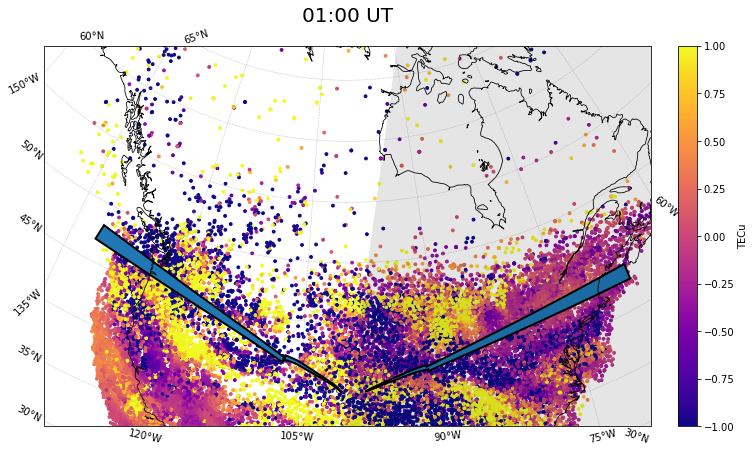

In [4]:
ax = plottingfunctions.single_plot(dt.datetime(2017, 9, 8, 1), df)

radar = 'fhw'
beam = 1
path, interp = plottingfunctions.get_outline(radar, beam)
patch = matplotlib.patches.PathPatch(path, edgecolor='k', lw=2, transform=ccrs.PlateCarree())
ax.add_patch(patch)

radar = 'fhe'
beam = 19
path, interp = plottingfunctions.get_outline(radar, beam)
patch = matplotlib.patches.PathPatch(path, edgecolor='k', lw=2, transform=ccrs.PlateCarree())
ax.add_patch(patch)



part = df[df['datetime'] == dt.datetime(2017, 9, 8, 1)]
df['contained'] = path.contains_points(np.vstack((df.glon, df.gdlat)).T)

_HdwInfo(stid=207, abbrev='cve', geographic=_Coord(lat=43.271, lon=-120.358, alt=1313.535), boresight=54.0, beam_separation=3.24, velocity_sign=1.0, rx_attenuator=10.0, tdiff=-0.398, phase_sign=1.0, interferometer_offset=_InterferometerOffset(x=0.0, y=-80.0, z=0.0), rx_rise_time=0.0, attenuation_stages=0.0, gates=110, beams=24)


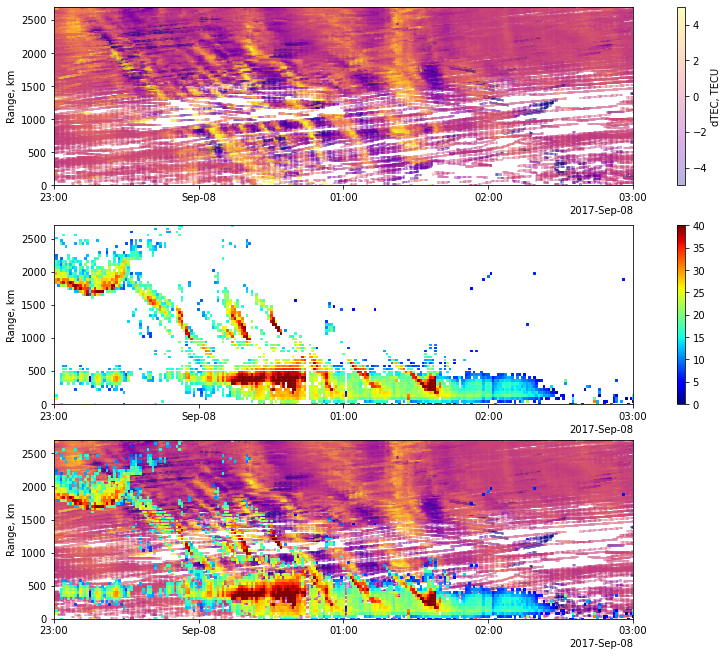

In [5]:

rad_df = pd.read_pickle('radar_2017-09-07cve18.pkl')
def threeplot(radar, beam, radar_df, tec_df):
    fig, axs = plt.subplots(3, 1, constrained_layout=True, figsize=(10, 9))

    #plotting TEC data only
    path, interp = plottingfunctions.get_outline(radar, beam)
    tec_df['contained'] = path.contains_points(np.vstack((tec_df.glon, tec_df.gdlat)).T) 
    part = tec_df.where(df['contained'] == 1).dropna()
    part['nrange'] = 45*interp(part.glon, part.gdlat)  
    a1 = axs[0].scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-5, vmax=5, marker='s', alpha=.3, s=2, cmap='plasma') 
    cbar = fig.colorbar(a1, ax=axs[0]) 
    cbar.set_alpha(1)
    cbar.set_label('dTEC, TECU') 

    #for plotting radar data
    beam_num = int(rad_df.bmnum.unique()[0])
    rad_df.slist = rad_df.slist * 45
    rad = axs[1].scatter(rad_df.time, rad_df.slist, c = rad_df.p_l, vmin = 0, vmax=40, cmap='jet', marker = 's', s=3)
    cbar = fig.colorbar(rad, ax=axs[1]) 

    #plotting both at once
    axs[2].scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-5, vmax=5, marker='s', alpha=.3, s=2, cmap='plasma')
    axs[2].scatter(rad_df.time, rad_df.slist, c = rad_df.p_l, vmin = 0, vmax=40, cmap='jet', marker = 's', s=3)

    #format the figure
    #matplotlib.rcParams['figure.dpi'] = 100 
    locator = mdates.AutoDateLocator(minticks=3, maxticks=7) 
    formatter = mdates.ConciseDateFormatter(locator)
    for ax in axs: 
        ax.xaxis.set_major_locator(locator) 
        ax.xaxis.set_major_formatter(formatter) 
        ax.set_xlim([start, end]) 
        ax.set_ylim([0, 2700]) 
        ax.set_ylabel('Range, km')




threeplot('cve', 18, rad_df, df)



     bmnum  gflg   noise.sky  npts  nrang        p_l  scan   slist    tfreq  \
199   18.0   1.0  141.699997  16.0  100.0  24.356434   0.0    90.0  14727.0   
200   18.0   1.0  141.699997  16.0  100.0  14.973265   0.0   135.0  14727.0   
201   18.0   1.0  141.699997  16.0  100.0  30.203745   0.0  1845.0  14727.0   
202   18.0   1.0  141.699997  16.0  100.0  29.708254   0.0  1890.0  14727.0   
203   18.0   1.0  141.699997  16.0  100.0  25.964193   0.0  1935.0  14727.0   

                          time         v        w_l  
199 2017-09-07 23:00:53.693877 -4.365675  11.700307  
200 2017-09-07 23:00:53.693877 -7.952096 -10.490098  
201 2017-09-07 23:00:53.693877  2.102349  -0.784830  
202 2017-09-07 23:00:53.693877  2.591173  -2.590165  
203 2017-09-07 23:00:53.693877  4.694778   1.346980  


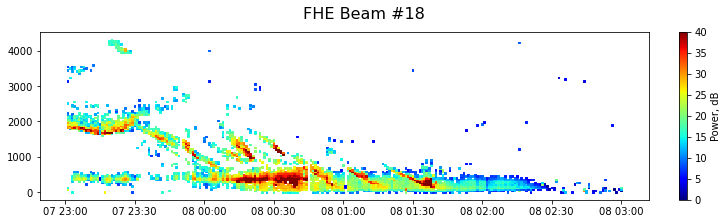

In [8]:

rad_df.slist = rad_df.slist * 45
def powerplot(filename, maxrange=60):
    rad_df = pd.read_pickle(filename)
    code = filename[-9:-7]
    fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(10, 3))
    beam_num = int(rad_df.bmnum.unique()[0])
    fig.suptitle(radar.upper() + ' Beam #' + str(beam_num), fontsize=16)
    plt.scatter(rad_df.time, rad_df.slist, c = rad_df.p_l, vmin = 0, vmax=40, cmap='jet', marker = 's', s=3)
    cbar = plt.colorbar()
    cbar.set_label('Power, dB')

powerplot('radar_2017-09-07cve18.pkl')

In [7]:
plottingfunctions.vel_ts(df, 'cve', 18, 500, 1000, start, end)

AttributeError: 'DataFrame' object has no attribute 'nrange'

Text(0, 0.5, 'Slant Range, km')

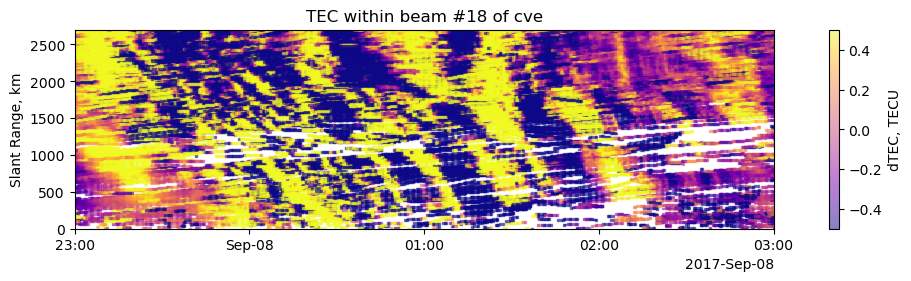

In [ ]:
part = df.where(df['contained'] == 1).dropna()

part['nrange'] = 45*interp(part.glon, part.gdlat)
fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(9, 2.7))
a1 = pts = axs.scatter(part.datetime, part.nrange, c=part['30min_detrend'], vmin=-.5, vmax=.5, marker='s', alpha=.5, s=2, cmap='plasma')
cbar = fig.colorbar(a1)
cbar.set_label('dTEC, TECU')
matplotlib.rcParams['figure.dpi'] = 300
locator = mdates.AutoDateLocator(minticks=3, maxticks=7)
formatter = mdates.ConciseDateFormatter(locator)
axs.xaxis.set_major_locator(locator)
axs.xaxis.set_major_formatter(formatter)
axs.set_xlim([start, end])
axs.set_ylim([0, 2700])
plt.title('TEC within beam #' + str(beam) + ' of ' + radar)
axs.set_ylabel("Slant Range, km")

In [ ]:

def plot_still(time, df, frame_code, start):
    import warnings
    warnings.filterwarnings('ignore')
    time = dt.datetime(2017, 9, 8, 1,30, 30)
    index = int((time - start).seconds / 60)
    fig = plt.figure(figsize = (25, 14))



    ax = fig.add_subplot(2, 2, 3, projection="fovcarto",coords="geo", plot_date=time,map_projection=ccrs.Orthographic(central_longitude=-100, central_latitude=60))
    ax.set_extent([-130, -70, 20, 60])
    ax.set_title('Fort Hays East/West', size=20)
    ax.grid_on()
    ax.coastlines()
    ax.add_dn_terminator()

    ax.rad='fhe'
    ax.overlay_radar()
    ax.overlay_fov()
    ax.overlay_radar_data(fhe[index], p_max=500, p_min=-500, add_colorbar=False, cmap='RdBu')

    ax.rad='fhw'
    ax.overlay_radar()
    ax.overlay_fov()
    ax.overlay_radar_data(fhw[index], p_max=500, p_min=-500, add_colorbar=False, cmap='RdBu')

    cmap = matplotlib.cm.RdBu
    norm = matplotlib.colors.Normalize(vmin=-500, vmax=500)
    cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,fraction=0.04, pad=0.04) 
    cbar.set_label('Velocity, m/s')

    ax = fig.add_subplot(2, 2, 4, projection="fovcarto",coords="geo", plot_date=time,map_projection=ccrs.Orthographic(central_longitude=-100, central_latitude=60))
    ax.set_extent([-130, -70, 20, 60])
    ax.set_title('Christmas Valley East/West', size=20)
    ax.grid_on()
    ax.coastlines()
    ax.add_dn_terminator()

    ax.rad='cve'
    ax.overlay_fov()
    ax.overlay_radar_data(cve[index], p_max=500, p_min=-500, add_colorbar=False, cmap ='RdBu')

    ax.rad='cvw'
    ax.overlay_fov()
    ax.overlay_radar()
    ax.overlay_radar_data(cvw[index], p_max=500, p_min=-500, add_colorbar=False, cmap ='RdBu')



    cmap = matplotlib.cm.RdBu
    norm = matplotlib.colors.Normalize(vmin=-500, vmax=500)
    cbar = plt.colorbar(matplotlib.cm.ScalarMappable(norm=norm, cmap=cmap), ax=ax,fraction=0.04, pad=0.04) 
    cbar.set_label('Velocity, m/s')
    
    #get tec based on time, use next 30 second time if not enough data 
    part = df[df['datetime'] == time]
    if len(part) < 10000:
        part = df[df['datetime'] == time + dt.timedelta(seconds = 30)]
    
    ax = fig.add_subplot(2, 2, 2, projection="fovcarto",coords="geo", plot_date=time,map_projection=ccrs.Orthographic(central_longitude=-100, central_latitude=60))
    ax.set_extent([-130, -70, 20, 60])
    ax.set_title('Raw GNSS TEC', size=20)
    mesh = ax.scatter(part.glon, part.gdlat, c=part['tec'], transform=ccrs.PlateCarree(), vmin=0, vmax=25, cmap='plasma', s=8, zorder=0, alpha=0.8)
    pos = ax.get_position()
    ax.grid_on()
    cbar = plt.colorbar(mesh, fraction=0.04, pad=0.04)
    cbar.set_label('TECu')
    ax.coastlines()
    ax.add_dn_terminator()

    ax = fig.add_subplot(2, 2, 1, projection="fovcarto",coords="geo", plot_date=time,map_projection=ccrs.Orthographic(central_longitude=-100, central_latitude=60))
    ax.set_extent([-130, -70, 20, 60])
    ax.set_title('30 min Detrended GNSS TEC', size=20)
    mesh = ax.scatter(part.glon, part.gdlat, c=part['30min_detrend'], transform=ccrs.PlateCarree(), vmin=-0.5, vmax=.5, cmap='winter', s=8, zorder=0, alpha=0.8)
    pos = ax.get_position()
    ax.grid_on()
    cbar = plt.colorbar(mesh, fraction=0.04, pad=0.04)
    cbar.set_label('TECu')
    ax.coastlines()
    ax.add_dn_terminator()

    fig.suptitle(time.strftime('%H:%M UT'), size=50)
    plt.show()

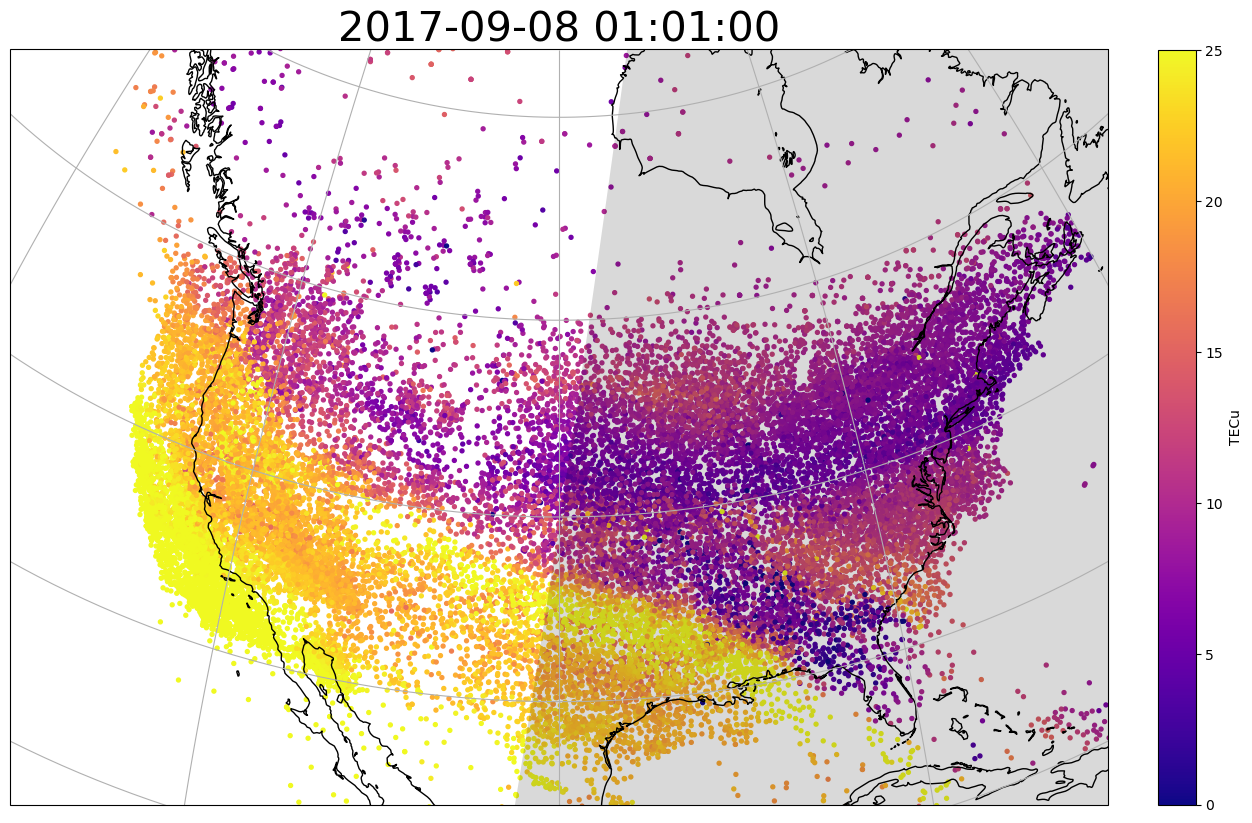

In [ ]:

tecmap = plt.figure(figsize=(16, 10))
time = dt.datetime(2017, 9, 8, 1, 1)
ax = plt.axes(projection = ccrs.Orthographic(central_longitude=-100, central_latitude=60))
ax.coastlines(color='black', zorder=1)
ax.gridlines()
ax.set_extent([-130, -70, 20, 60])
ax.add_feature(Nightshade(time, alpha=0.15))
   
part = df[df['datetime'] == time]

        
ax.set_title(str(time), size=30)    
mesh = ax.scatter(part.glon, part.gdlat, c=part.tec, transform=ccrs.PlateCarree(), vmin=0, vmax=25, cmap='plasma', s=8)
cbar = plt.colorbar(mesh, fraction=0.046, pad=0.04)
cbar.set_label('TECu')

plt.show()